In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2
import numpy as np
!pip install -U keras
!pip install tensorflow-gpu==2.1.0rc0

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
     |████████████████████████████████| 402.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 28.8MB/s 
     |████████████████████████████████| 450kB 42.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f12f958540307ec9190d24ca170e2cd9d7c52fc3bf169e9917acff5e934db547
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 wh

In [0]:
import math
import random
import keras
from keras.layers import *
from keras.models import Sequential
from keras import Model

Using TensorFlow backend.


In [0]:
PATH = "/content/drive/My Drive/Breast Cancer Treatment/Numpy Arrays/Ki67"

Train = ['230','242','232','263']
Test  = ['221', '229', '246', '252','239']

# Train set patients: 230 232 242 263 
TrainX_1 = np.load(PATH + '/Ki67 IHC 230 Images.npy')
TrainY_1 = np.load(PATH + '/Ki67 IHC 230 Masks.npy')
TrainX_2 = np.load(PATH + '/Ki67 IHC 242 Images.npy')
TrainY_2 = np.load(PATH + '/Ki67 IHC 242 Masks.npy')
TrainX_3 = np.load(PATH + '/Ki67 IHC 263 Images.npy')
TrainY_3 = np.load(PATH + '/Ki67 IHC 263 Masks.npy')
TrainX_4 = np.load(PATH + '/Ki67 IHC 232 Images.npy')
TrainY_4 = np.load(PATH + '/Ki67 IHC 232 Masks.npy')

# Test set patients: 221 229 239 246 252
TestX_1 = np.load(PATH + '/Ki67 IHC 221 Images.npy')
TestY_1 = np.load(PATH + '/Ki67 IHC 221 Masks.npy')
TestX_2 = np.load(PATH + '/Ki67 IHC 229 Images.npy')
TestY_2 = np.load(PATH + '/Ki67 IHC 229 Masks.npy')
TestX_3 = np.load(PATH + '/Ki67 IHC 246 Images.npy')
TestY_3 = np.load(PATH + '/Ki67 IHC 246 Masks.npy')
TestX_4 = np.load(PATH + '/Ki67 IHC 252 Images.npy')
TestY_4 = np.load(PATH + '/Ki67 IHC 252 Masks.npy')
TestX_5 = np.load(PATH + '/Ki67 IHC 239 Images.npy')
TestY_5 = np.load(PATH + '/Ki67 IHC 239 Masks.npy')

In [0]:
def convertToLabels(data):
  data[data==128]=1
  data[data==255]=2

def convertFromLabels(data):
  data[data==1]=128
  data[data==2]=255

In [0]:
TrainX = np.concatenate((TrainX_1, TrainX_2, TrainX_3, TrainX_4), axis=0)
TrainGT = np.concatenate((TrainY_1, TrainY_2, TrainY_3, TrainY_4), axis=0)
TrainY = np.copy(TrainGT)
convertToLabels(TrainY)
TrainY = keras.utils.to_categorical(TrainY,num_classes=3,dtype='int16')

# Train = list(zip(TrainX,TrainY))
# random.shuffle(Train)
# TrainX,TrainY = zip(*Train)
# TrainX = np.asarray(list(TrainX))
# TrainY = np.asarray(list(TrainY))

TestX = np.concatenate((TestX_1, TestX_2, TestX_3,TestX_4,TestX_5), axis=0)
TestGT = np.concatenate((TestY_1, TestY_2, TestY_3,TestY_4,TestY_5), axis=0)
TestY = np.copy(TestGT)
convertToLabels(TestY)
TestY = keras.utils.to_categorical(TestY,num_classes=3, dtype='int16')

ValidX = TrainX[1800:, : ]
ValidY = TrainY[1800:, : ]

TrainX = TrainX[0:1800, : ]
TrainY = TrainY[0:1800, : ]

In [0]:
TrainX = TrainX.astype('float32')/255
TestX = TestX.astype('float32')/255
ValidX = ValidX.astype('float32')/255

In [0]:
print(TrainX.shape)
print(TrainY.shape)

print(TestX.shape)
print(TestY.shape)

print(ValidX.shape)
print(ValidY.shape)

(1800, 240, 240, 3)
(1800, 240, 240, 3)
(2400, 240, 240, 3)
(2400, 240, 240, 3)
(216, 240, 240, 3)
(216, 240, 240, 3)


In [0]:
def get_conv_block(input_layer,nFilters,size):
    conv1 = Conv2D(nFilters, size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_layer)
    bn1 = BatchNormalization()(conv1)
    conv2 = Conv2D(nFilters, size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(bn1)
    bn2 = BatchNormalization()(conv2)
    return bn2
    
def get_model(inputShape,nFilters): 

    input_layer = Input(shape=inputShape)
    block1 = get_conv_block(input_layer,nFilters,3)
    mp1 = MaxPooling2D(pool_size=(2, 2))(block1)
    dr1 = Dropout(0.1)(mp1)
    
    block2 = get_conv_block(dr1,nFilters*2,3)
    mp2 = MaxPooling2D(pool_size=(2, 2))(block2)
    dr2 = Dropout(0.1)(mp2)

    block3 = get_conv_block(dr2,nFilters*4,3)
    mp3 = MaxPooling2D(pool_size=(2, 2))(block3)
    dr3 = Dropout(0.1)(mp3)
      
    block4 = get_conv_block(dr3,nFilters*8,3)
    mp4 = MaxPooling2D(pool_size=(2, 2))(block4)
    dr4 = Dropout(0.1)(mp4)

    conv5 = Conv2D(nFilters*16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(dr4)
    conv5 = Conv2D(nFilters*16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)

    up1 = Conv2DTranspose(nFilters*8,(3,3),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(conv5)
    cat1 = concatenate([block4, up1, mp3])
    dr1 = Dropout(0.1)(cat1)
    block5 = get_conv_block(dr1,nFilters*8,3)

    up2 = Conv2DTranspose(nFilters*4,(3,3),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block5)
    b4_upsample = Conv2DTranspose(nFilters*4,(3,3),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block4)
    cat2 = concatenate([block3, up2, b4_upsample, mp2])
    dr2 = Dropout(0.1)(cat2)
    block6 = get_conv_block(dr2,nFilters*4,3)
    
    up3 = Conv2DTranspose(nFilters*2,(3,3),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block6)
    b3_upsample = Conv2DTranspose(nFilters*2,(3,3),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block3)
    cat3 = concatenate([block2, up3, mp1, b3_upsample])
    dr3 = Dropout(0.1)(cat3)
    block7 = get_conv_block(dr3,nFilters*2,3)
    
    up4 = Conv2DTranspose(nFilters,(3,3),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block7)
    b2_upsample = Conv2DTranspose(nFilters,(3,3),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block2)
    cat4 = concatenate([block1, up4, b2_upsample])
    dr4 = Dropout(0.1)(cat4)
    block8 = get_conv_block(dr4,nFilters,3)

    conv10 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(block8)
    conv11 = Conv2D(3,(1,1), activation='softmax', padding = 'same')(conv10)

    model = Model(input_layer,conv11)
    return model

In [0]:
model1 = get_model((240,240,3),16)
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 240, 240, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 240, 240, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 240, 240, 16) 2320        batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [0]:
def tversky_loss(y_true, y_pred):
    alpha = 0.45
    beta  = 0.55
    
    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    
    num = K.sum(p0*g0, (0,1,2))
    den = num + alpha*K.sum(p0*g1,(0,1,2)) + beta*K.sum(p1*g0,(0,1,2))
    
    T = K.sum(num/den) # when summing over classes, T has dynamic range [0 Ncl]
    
    Ncl = K.cast(K.shape(y_true)[-1], 'float32')
    return Ncl-T

def combined_loss(y_true, y_pred):
  return (0.5*K.categorical_crossentropy(y_true, y_pred))+(1*tversky_loss(y_true, y_pred))

In [0]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('Checkpoint.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.001, decay=0.0, amsgrad=True)

In [0]:
batch_size = 16
def get_batch(batch_size, X_train, Y_train): 
    size_batch = batch_size
    last_index = len(X_train) - 1
    x_train = X_train
    y_train = Y_train 
    while True:
        batch_data = [[],[]]
        for i in range(0, size_batch):
            random_index = random.randint(0, last_index)
            batch_data[0].append(x_train[random_index])
            batch_data[1].append(y_train[random_index])

        yield (np.array(batch_data[0]), np.array(batch_data[1]))     

In [0]:
from keras import backend as K      
model1.compile(loss=combined_loss, optimizer= optimizer , metrics=[dice_coef,'accuracy'])

In [0]:
num_epoch = 100
datagen = get_batch(batch_size, TrainX, TrainY)
MODELS_PATH = "/content/drive/My Drive/Breast Cancer Treatment/Models/3 Class/Ki67"
n_points = len(TrainX)
history = model1.fit(datagen, 
                validation_data = (ValidX, ValidY),
                epochs=num_epoch,steps_per_epoch = math.ceil(n_points / batch_size), callbacks =[es,mc],  shuffle =True)
model1.save(MODELS_PATH + '/Laddernet_A_13MAY.h5')

Epoch 1/100
113/113 [==============================] - 26s 231ms/step - loss: 1.2511 - dice_coef: 0.8256 - accuracy: 0.8725 - val_loss: 2.3855 - val_dice_coef: 0.7683 - val_accuracy: 0.7669

Epoch 00001: val_loss improved from inf to 2.38550, saving model to Checkpoint.h5
Epoch 2/100
113/113 [==============================] - 25s 224ms/step - loss: 1.1370 - dice_coef: 0.8439 - accuracy: 0.8918 - val_loss: 1.7258 - val_dice_coef: 0.8126 - val_accuracy: 0.8205

Epoch 00002: val_loss improved from 2.38550 to 1.72582, saving model to Checkpoint.h5
Epoch 3/100
113/113 [==============================] - 25s 224ms/step - loss: 1.0682 - dice_coef: 0.8520 - accuracy: 0.8955 - val_loss: 1.4285 - val_dice_coef: 0.7557 - val_accuracy: 0.8089

Epoch 00003: val_loss improved from 1.72582 to 1.42848, saving model to Checkpoint.h5
Epoch 4/100
113/113 [==============================] - 25s 224ms/step - loss: 1.0017 - dice_coef: 0.8574 - accuracy: 0.8994 - val_loss: 0.9790 - val_dice_coef: 0.8634 - val_

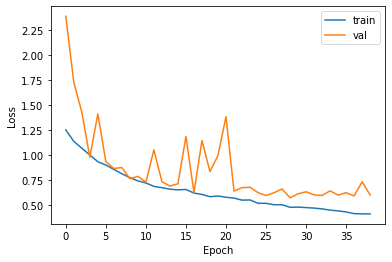

In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

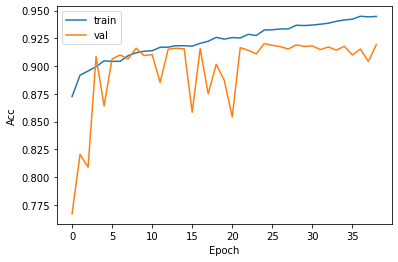

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
MODELS_PATH = "/content/drive/My Drive/Breast Cancer Treatment/Models/3 Class/Ki67/"
model1 = keras.models.load_model(MODELS_PATH +'/Laddernet_A_13MAY.h5',custom_objects={ 'combined_loss': combined_loss, 'dice_coef': dice_coef })

In [0]:
trainResult = model1.predict(TrainX, batch_size=8)
validResult = model1.predict(ValidX,batch_size=8)
testResult = model1.predict(TestX,batch_size=8)

In [0]:
trainResult = np.argmax(trainResult,axis=-1)
validResult = np.argmax(validResult,axis=-1)
testResult = np.argmax(testResult,axis=-1)

trainResult = keras.utils.to_categorical(trainResult,num_classes=3,dtype='int16')
validResult = keras.utils.to_categorical(validResult,num_classes=3,dtype='int16')
testResult = keras.utils.to_categorical(testResult,num_classes=3,dtype='int16')

In [0]:
model2 = get_model((240,240,3),4)
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 240, 240, 4)  112         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_17 (BatchNo (None, 240, 240, 4)  16          conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 240, 240, 4)  148         batch_normalization_17[0][0]     
____________________________________________________________________________________________

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
datagen = get_batch(batch_size, trainResult, TrainY)
num_epoch = 75
n_points = len(trainResult)

model2.compile(loss=combined_loss, optimizer= optimizer , metrics=[dice_coef,'accuracy'])
history = model2.fit(datagen, 
                validation_data = (validResult, ValidY),
                epochs=num_epoch,steps_per_epoch = math.ceil(n_points / batch_size), callbacks =[es,mc],  shuffle =True)
model2.save(MODELS_PATH + '/Laddernet_B_13MAY.h5')

Epoch 1/75
113/113 [==============================] - 18s 156ms/step - loss: 1.3211 - dice_coef: 0.7837 - accuracy: 0.8623 - val_loss: 1.1380 - val_dice_coef: 0.8522 - val_accuracy: 0.9159

Epoch 00001: val_loss did not improve from 0.57320
Epoch 2/75
113/113 [==============================] - 12s 105ms/step - loss: 0.8830 - dice_coef: 0.8826 - accuracy: 0.9460 - val_loss: 1.0074 - val_dice_coef: 0.8683 - val_accuracy: 0.9165

Epoch 00002: val_loss did not improve from 0.57320
Epoch 3/75
113/113 [==============================] - 12s 105ms/step - loss: 0.7569 - dice_coef: 0.8967 - accuracy: 0.9478 - val_loss: 0.9042 - val_dice_coef: 0.8798 - val_accuracy: 0.9184

Epoch 00003: val_loss did not improve from 0.57320
Epoch 4/75
113/113 [==============================] - 12s 105ms/step - loss: 0.6828 - dice_coef: 0.9024 - accuracy: 0.9470 - val_loss: 0.8361 - val_dice_coef: 0.8870 - val_accuracy: 0.9190

Epoch 00004: val_loss did not improve from 0.57320
Epoch 5/75
113/113 [================

In [0]:
MODELS_PATH = "/content/drive/My Drive/Breast Cancer Treatment/Models/3 Class/Ki67/"
model2 = keras.models.load_model(MODELS_PATH +'/Laddernet_B_13MAY.h5',custom_objects={ 'combined_loss': combined_loss, 'dice_coef': dice_coef })

In [0]:
trainResult = model2.predict(trainResult, batch_size=8)
validResult = model2.predict(validResult,batch_size=8)
testResult = model2.predict(testResult,batch_size=8)

In [0]:
trainResult = np.argmax(trainResult,axis=-1)
validResult = np.argmax(validResult,axis=-1)
testResult = np.argmax(testResult,axis=-1)

convertFromLabels(trainResult)
convertFromLabels(validResult)
convertFromLabels(testResult)

print(trainResult.shape)
print(validResult.shape)
print(testResult.shape)

(1800, 240, 240)
(216, 240, 240)
(2400, 240, 240)


In [0]:
def stitchMaskPatches(pieces):
  k = 0
  reconstructed_img = np.ones([1440,1920])
  for r in range(6):
    row = r * 240
    for c in range(8):
      col = c * 240
      reconstructed_img[row:row+240,col:col+240] = pieces[k]
      k = k + 1
  return reconstructed_img


def stitchImagePatches(pieces):
  k = 0
  reconstructed_img = np.ones([1440,1920,3])
  for r in range(6):
    row = r * 240
    for c in range(8):
      col = c * 240
      reconstructed_img[row:row+240,col:col+240,:] = pieces[k]
      k = k + 1
  return reconstructed_img

In [0]:
def saveNumpyOutput(mask, Patient_array,title):
  num = mask.shape[0]/480
  for id in range(int(num)):
    temp = []
    for i in range(id*10, id*10+10):
      print(i)
      idx = i * 48
      final_output = mask[idx:idx+48]
      final_output = stitchMaskPatches(final_output)
      temp.append(final_output)
    final_output = np.asarray(temp)
    np.save("/content/drive/My Drive/Breast Cancer Treatment/Numpy Arrays/Predicted Output/Ki67/LadderNet/" + title + Patient_array[id], final_output)

In [0]:
# saving predicted outputs as numpy arrays for test images

trainResult = np.append(trainResult, validResult, axis=0)
saveNumpyOutput(trainResult, Train,"Train/")
saveNumpyOutput(testResult, Test, "Test/")

In [0]:
trial2 = np.copy(trainResult)
convertToLabels(trial2)
trial1 = np.argmax(TrainY,axis=-1)

In [0]:
trial1 = np.reshape(trial1,(-1, 1))
trial2 = np.reshape(trial2,(-1, 1))

In [0]:
from sklearn import metrics

print("TRAIN")
print(metrics.classification_report(trial1, trial2))
train_JC = metrics.jaccard_score(trial1, trial2, average='weighted')
print("JACCARD COEFFICIENT:  ",train_JC)

TRAIN
              precision    recall  f1-score   support

           0       0.97      0.96      0.97  79193181
           1       0.89      0.90      0.89  15063764
           2       0.87      0.91      0.89   9423055

    accuracy                           0.95 103680000
   macro avg       0.91      0.92      0.92 103680000
weighted avg       0.95      0.95      0.95 103680000

JACCARD COEFFICIENT:   0.9070076892448551


In [0]:
trial2 = np.copy(testResult)
convertToLabels(trial2)
trial1 = np.argmax(TestY,axis=-1)

In [0]:
trial1 = np.reshape(trial1,(-1, 1))
trial2 = np.reshape(trial2,(-1, 1))

In [0]:
print("\n\nTEST")
print(metrics.classification_report(trial1, trial2))
test_JC = metrics.jaccard_score(trial1, trial2, average='weighted')
print("JACCARD COEFFICIENT:  ",test_JC)



TEST
              precision    recall  f1-score   support

           0       0.93      0.95      0.94 105465860
           1       0.78      0.76      0.77  20657640
           2       0.88      0.77      0.82  12116500

    accuracy                           0.91 138240000
   macro avg       0.86      0.83      0.85 138240000
weighted avg       0.91      0.91      0.91 138240000

JACCARD COEFFICIENT:   0.8352695462306372


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(48, 240, 240)
(48, 240, 240, 3)
(1440, 1920, 3)
(1440, 1920)
(1440, 1920)
[  0. 128. 255.]


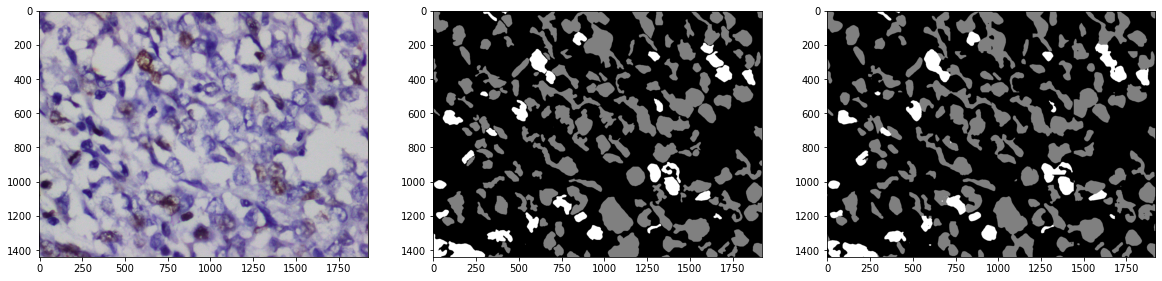

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


plt.figure(figsize=(20,20))
id = 2  # enter between 0- 40 since there are 4 patients with 10 images each

id = id * 48
final_input = TrainX[id:id+48]

Mask_input = TrainY[id:id+48]

Mask_input = np.argmax(Mask_input, axis = 3)
convertFromLabels(Mask_input)
print(Mask_input.shape)
print(final_input.shape)
final_output = trainResult[id:id+48]

final_input = stitchImagePatches(final_input)
Mask_input =  stitchMaskPatches(Mask_input)
final_output = stitchMaskPatches(final_output)

print(final_input.shape)
print(final_output.shape)
print(Mask_input.shape)

print(np.unique(final_output))
copy1  = np.copy(final_input)
copy2 = copy1.astype('float32')*255
copy2 = copy2.astype('uint8')
final_input = np.reshape(copy2,(1440, 1920,3))
final_input = cv2.cvtColor(final_input,cv2.COLOR_BGR2RGB)

plt.subplot(131).imshow(final_input)
plt.subplot(132).imshow(Mask_input,'gray')
plt.subplot(133).imshow(final_output,'gray')

(48, 240, 240)
(48, 240, 240, 3)
(1440, 1920, 3)
(1440, 1920)
(1440, 1920)
[  0. 128. 255.]


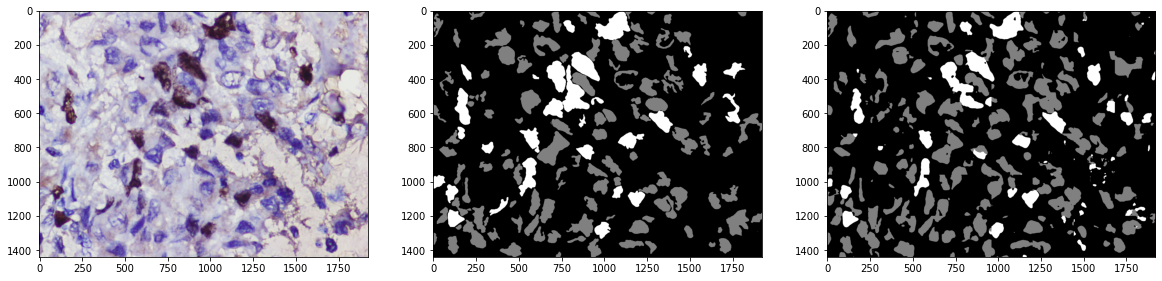

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


plt.figure(figsize=(20,20))
id = 2  # enter between 0- 40 since there are 4 patients with 10 images each

id = id * 48
final_input = TestX[id:id+48]

Mask_input = TestY[id:id+48]

Mask_input = np.argmax(Mask_input, axis = 3)
convertFromLabels(Mask_input)
print(Mask_input.shape)
print(final_input.shape)
final_output = testResult[id:id+48]

final_input = stitchImagePatches(final_input)
Mask_input =  stitchMaskPatches(Mask_input)
final_output = stitchMaskPatches(final_output)

print(final_input.shape)
print(final_output.shape)
print(Mask_input.shape)

print(np.unique(final_output))
copy1  = np.copy(final_input)
copy2 = copy1.astype('float32')*255
copy2 = copy2.astype('uint8')
final_input = np.reshape(copy2,(1440, 1920,3))
final_input = cv2.cvtColor(final_input,cv2.COLOR_BGR2RGB)

plt.subplot(131).imshow(final_input)
plt.subplot(132).imshow(Mask_input,'gray')
plt.subplot(133).imshow(final_output,'gray')

In [0]:
SAVE_PATH = "/content/drive/My Drive/Breast Cancer Treatment/Predicted Images/Ki67/UNET/13-05-2020/Test"
def saveImageOutput(patients, GroundTruth, Predicted):
  totalimages = patients * 10
  for id in range(totalimages):
    index = id * 48
    Mask_input = GroundTruth[index:index+48]
    Mask_input = np.argmax(Mask_input, axis = 3)
    convertFromLabels(Mask_input)
    final_output = Predicted[index:index+48]
    Mask_input   = stitchMaskPatches(Mask_input)
    final_output = stitchMaskPatches(final_output)
    cv2.imwrite(SAVE_PATH + '/Ground Truth/Image '+ str(id) + '.png', Mask_input)
    cv2.imwrite(SAVE_PATH +  '/Predicted Mask/Image '+ str(id) + '.png', final_output)

In [0]:
saveImageOutput(5, TestY, testResult)
# saveImageOutput(4, TrainY, trainResult)